In [1]:
import pandas as pd
import numpy as np
import json
from sqlalchemy import create_engine
import sqlite3
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table'", conn)
tables

,name
0,business_df
1,checkin_df
2,review_df
3,tip_df
4,user_df


In [97]:
for table in tables["name"]:
    display(pd.read_sql_query(f"Select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


#### Data Analysis

In [5]:
pd.read_sql_query("select count(*) as total_row from business_df", conn)

,total_row
0,150346


In [6]:
business_id = pd.read_sql_query("""Select business_id from business_df 
                  where categories like '%restaurant%' collate nocase 
                  and is_open=1""", conn)

In [7]:
#what is the descriptive stats for review count and star rating for business?

pd.read_sql_query((f"""
       select avg(review_count) as avg_review, 
       min(review_count) as min_review,
       max(review_count) as max_review,
       (select review_count from business_df  order by review_count limit 1 offset (select count(*) from business_df)/2) as median_review ,
       
       avg(stars) as avg_star,
       min(stars) as min_star,
       max(stars) as max_star,
       (select stars from business_df order by stars limit 1 offset (select count(*) from business_df)/2) as median_star
       
       from business_df
       where business_id in {tuple(business_id["business_id"])}
       """),conn).transpose()

,0
avg_review,104.097789
min_review,5.000000
max_review,7568.000000
median_review,15.000000
avg_star,3.523969
min_star,1.000000
max_star,5.000000
median_star,3.500000


In [8]:
# remove outliers
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3+IQR*1.5
    lower_bound =  q1-IQR*1.5
    return df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [9]:
business_id = pd.read_sql_query("""Select business_id, review_count from business_df 
                  where categories like '%restaurant%' collate nocase 
                  and is_open=1""", conn)

In [10]:
# business_id where review count outlier has been removed
business_id= remove_outlier(business_id, "review_count")

In [54]:
#what is the descriptive stats for review count and star rating for business without outlier?

pd.read_sql_query((f"""
       select avg(review_count) as avg_review, 
       min(review_count) as min_review,
       max(review_count) as max_review,
       (select review_count from business_df  order by review_count limit 1 offset (select count(*) from business_df)/2) as median_review ,
       
       avg(stars) as avg_star,
       min(stars) as min_star,
       max(stars) as max_star,
       (select stars from business_df order by stars limit 1 offset (select count(*) from business_df)/2) as median_star
       
       from business_df
       where business_id in {tuple(business_id["business_id"])}
       """),conn).transpose()

,0
avg_review,55.975426
min_review,5.000000
max_review,248.000000
median_review,15.000000
avg_star,3.477281
min_star,1.000000
max_star,5.000000
median_star,3.500000


In [ ]:
# which restairant has the highest reviews

pd.read_sql_query(f"""select name, sum(review_count) as total_review, avg(stars) as avg_rating
                  from business_df
                  where business_id in {tuple(business_id['business_id'])}
                  group by name
                  order by total_review desc limit 10""", conn)

,name,total_review,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [ ]:
# which restairant has the highest rating

pd.read_sql_query(f"""select name, sum(review_count) as total_review, avg(stars) as avg_rating
                  from business_df
                  where business_id in {tuple(business_id['business_id'])}
                  group by name
                  order by avg_rating desc limit 10""", conn)

,name,total_review,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [ ]:
pd.read_sql_query(f"""select distinct business_id from checkin_df where business_id in {tuple(business_id['business_id'])}""", conn)

,business_id
0,---kPU91CF4Lq2-WlRu9Lw
1,--0iUa4sNDFiZFrAdIWhZQ
2,--epgcb7xHGuJ-4PUeSLAw
3,--hF_3v1JmU9nlu4zfXJ8Q
4,--lqIzK-ZVTtgwiQM63XgQ
...,...
31059,zzbZtgPYZS8sTIWQH6DwEw
31060,zziDpuuJw-Km1J4BaGpBKA
31061,zzjFdJwXuxBOGe9JeY_EMw
31062,zznJox6-nmXlGYNWgTDwQQ


In [12]:
# do restaurant with higer engangement tend to have higher rating?

df = pd.read_sql_query(
    f"""
    with new_business as (
        select business_id, avg(stars) as avg_stars, sum(review_count) as total_review from business_df
        group by business_id
    ),
    new_checkin as(
       select business_id, (length(date)-length(replace(date, ',', ''))+1) as checkin_count from checkin_df 
    ),
    new_tip as (
        select business_id, count(business_id) as total_tip from tip_df
        group by business_id
    )
    select b.avg_stars, avg(b.total_review) as avg_review, avg(c.checkin_count) as avg_checkin, 
    avg(t.total_tip) as avg_tip 
    from new_business as b
    left join new_checkin as c on b.business_id=c.business_id 
    left join new_tip as t on b.business_id=t.business_id
    and b.business_id in {tuple(business_id['business_id'])}
    group by b.avg_stars""", conn
)
                  

In [13]:
df

,avg_stars,avg_review,avg_checkin,avg_tip
0,1.0,13.444109,9.656762,2.781513
1,1.5,20.527372,26.085855,3.884654
2,2.0,21.947937,41.125046,4.581058
3,2.5,27.093951,65.999292,6.325225
4,3.0,36.119547,92.840659,8.301950
5,3.5,51.179268,123.563771,10.320786
6,4.0,71.465863,164.169624,11.329362
7,4.5,55.333726,104.124897,8.995201
8,5.0,16.462501,20.730759,4.269082


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

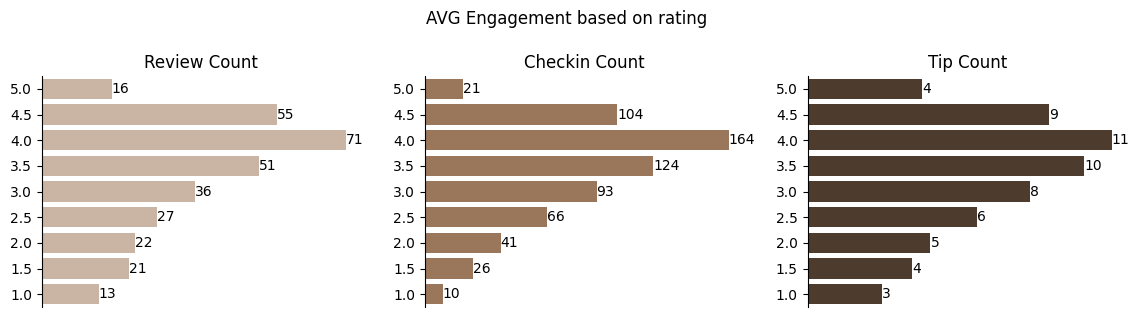

In [53]:
plt.figure(figsize=(14,3))
plt.suptitle('AVG Engagement based on rating', y=1.1)

plt.subplot(1,3,1)
plt.title("Review Count")
sns.barplot(data=df, x="avg_review", y="avg_stars", orient='h', color="#D0B49F")
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.gca().invert_yaxis()
sns.despine(bottom=True)
for i, value in enumerate(df["avg_review"]):
    plt.text(value, i, str(round(value)), color="black", va="center")

plt.subplot(1,3,2)
plt.title("Checkin Count")
sns.barplot(data=df, x="avg_checkin", y="avg_stars", orient='h', color="#A47551")
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.gca().invert_yaxis()
sns.despine(bottom=True)
for i, value in enumerate(df["avg_checkin"]):
    plt.text(value, i, str(round(value)), color="black", va="center")
    
plt.subplot(1,3,3)
plt.title("Tip Count")
sns.barplot(data=df, x="avg_tip", y="avg_stars", orient='h', color="#523A28")
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.gca().invert_yaxis()
sns.despine(bottom=True)
for i, value in enumerate(df["avg_tip"]):
    plt.text(value, i, str(round(value)), color="black", va="center")
    

plt.show()

In [59]:
# do restaurant with higer engangement tend to have higher rating?

df = pd.read_sql_query(
    f"""
    with new_business as (
        select business_id, avg(stars) as avg_stars, sum(review_count) as total_review from business_df
        group by business_id
    ),
    new_checkin as(
       select business_id, (length(date)-length(replace(date, ',', ''))+1) as checkin_count from checkin_df 
    ),
    new_tip as (
        select business_id, count(business_id) as total_tip from tip_df
        group by business_id
    )
    select b.business_id, b.avg_stars, b.total_review, c.checkin_count, t.total_tip 
    from new_business as b
    left join new_checkin as c on b.business_id=c.business_id 
    left join new_tip as t on b.business_id=t.business_id
    and b.business_id in {tuple(business_id['business_id'])}""", conn
).dropna()
                  

<Axes: >

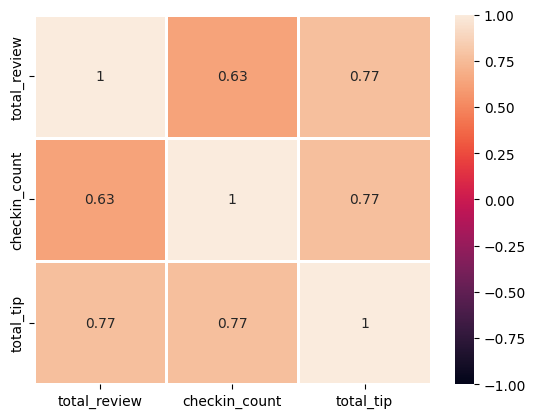

In [71]:
sns.heatmap(data=df.iloc[:,2:].corr(), annot=True, vmax=1, vmin=-1, linewidths=2)

In [72]:
# do restaurant with higer engangement tend to have higher rating?

df = pd.read_sql_query(
    f"""
    with new_business as (
        select business_id, avg(stars) as avg_stars, sum(review_count) as total_review from business_df
        group by business_id
    ),
    new_checkin as(
       select business_id, (length(date)-length(replace(date, ',', ''))+1) as checkin_count from checkin_df 
    ),
    new_tip as (
        select business_id, count(business_id) as total_tip from tip_df
        group by business_id
    )
    select b.business_id, b.avg_stars, b.total_review, c.checkin_count, t.total_tip,
    case when b.avg_stars >= 3.5 then 'High rated'
    else 'Low rated' end as status
    from new_business as b
    left join new_checkin as c on b.business_id=c.business_id 
    left join new_tip as t on b.business_id=t.business_id
    and b.business_id in {tuple(business_id['business_id'])}""", conn
).dropna()
                  

In [111]:
df

,business_id,avg_stars,total_review,checkin_count,total_tip,status
0,---kPU91CF4Lq2-WlRu9Lw,4.5,24,11.0,4.0,High rated
1,--0iUa4sNDFiZFrAdIWhZQ,3.0,14,10.0,6.0,Low rated
24,--epgcb7xHGuJ-4PUeSLAw,3.0,34,118.0,6.0,Low rated
28,--lqIzK-ZVTtgwiQM63XgQ,2.0,15,21.0,2.0,Low rated
42,-09Oc2D14vRnmirPh0vlXw,3.0,135,500.0,25.0,Low rated
...,...,...,...,...,...,...
150323,zzIF9qp2UoHN48EeZH_IDg,3.0,19,6.0,5.0,Low rated
150333,zzbZtgPYZS8sTIWQH6DwEw,3.0,86,292.0,17.0,Low rated
150337,zziDpuuJw-Km1J4BaGpBKA,3.5,6,20.0,2.0,High rated
150339,zzjFdJwXuxBOGe9JeY_EMw,4.0,47,27.0,2.0,High rated


In [74]:
# is there a difference between the user engagement (review, tips, checkin) between high-rated and low-rated business?
df.groupby('status')[['total_review', 'checkin_count', 'total_tip']].mean()

,total_review,checkin_count,total_tip
status,,,
High rated,72.291062,122.066641,10.162766
Low rated,42.123420,88.880828,6.541689


In [131]:
# measure to calculate success score of a business

def calculate_success_metric(df):
    success_score=[]
    for index, row in df.iterrows():
        score = row['avg_stars'] * np.log(row['total_review']+1)
        success_score.append(score)
    return success_score

In [83]:
# how do the success metrics (review_count or avg_stars) of restaurants vary across different states and cities?

city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, 
                  avg(stars) as avg_stars, sum(review_count) as total_review,
                  count(*) as restaurant_count 
                  from business_df
                  where business_id in {tuple(business_id['business_id'])}
                  group by state, city
                  order by restaurant_count desc limit 10""",
                  conn)

In [84]:
city_df['success_score'] = calculate_success_metric(city_df)

In [85]:
city_df

,city,state,latitude,longitude,avg_stars,total_review,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
4,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
5,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
6,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
7,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
8,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [94]:
import folium
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)
color_scale = folium.LinearColormap(colors=['#FFF3D9', '#B8390E', '#3B0918'], 
                                    vmin=city_df.success_score.min(),
                                    vmax=city_df.success_score.max())

for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color= color_scale(row['success_score']),
        fill=True,
        fill_color = color_scale(row['success_score']),
        fill_opacity = 0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)
    
m.add_child(color_scale)

In [ ]:
# is there any patterns in user engagement over time for successful businesses compared to less successful ones?
# are there any seasonal trends in the user engagement for restaurants?

In [99]:
for table in tables['name']:
    display(pd.read_sql_query(f"""select * from {table} limit 5""", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [114]:
high_rated_engagement = pd.read_sql_query(f"""
                  with new_tip as (
                      select strftime('%m-%Y', date) as month_year, count(*) as tip_count 
                      from tip_df as t, business_df as b
                      where t.business_id = b.business_id
                      and b.business_id in {tuple(business_id['business_id'])} and b.stars>=3.5
                      group by month_year
                  ),
                  new_review as (
                      select strftime('%m-%Y', date) as month_year, count(*) as review_count
                      from review_df as r, business_df as b
                      where r.business_id = b.business_id
                      and b.business_id in {tuple(business_id['business_id'])} and b.stars>=3.5
                      group by month_year
                  )
                  select t.month_year, r.review_count, t.tip_count from new_review as r, new_tip as t
                  where r.month_year = t.month_year 
                  order by t.month_year
                  """, conn)

low_rated_engagement = pd.read_sql_query(f"""
                  with new_tip as (
                      select strftime('%m-%Y', date) as month_year, count(*) as tip_count 
                      from tip_df as t, business_df as b
                      where t.business_id = b.business_id
                      and b.business_id in {tuple(business_id['business_id'])} and b.stars<3.5
                      group by month_year
                  ),
                  new_review as (
                      select strftime('%m-%Y', date) as month_year, count(*) as review_count
                      from review_df as r, business_df as b
                      where r.business_id = b.business_id
                      and b.business_id in {tuple(business_id['business_id'])} and b.stars<3.5
                      group by month_year
                  )
                  select t.month_year, r.review_count, t.tip_count from new_review as r, new_tip as t
                  where r.month_year = t.month_year 
                  order by t.month_year
                  """, conn)

In [115]:
time_rating = pd.read_sql_query(f"""
    SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
    FROM review_df
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY month_year
    ORDER BY month_year
    ;""", conn)


In [116]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']


In [117]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

In [135]:
#How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

sentiment_df = pd.read_sql_query(f"""
SELECT b.business_id, AVG(b.stars) as avg_stars, SUM(b.review_count) as total_review,
SUM(s.useful_count) as useful_count, SUM(s.funny_count) as funny_count, SUM(s.cool_count) as cool_count
FROM
(SELECT business_id, SUM(useful) as useful_count, SUM(funny) as funny_count, SUM(cool) as cool_count
FROM review_df
GROUP BY business_id) as s
JOIN business_df as b on b.business_id = s.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count
""", conn)
sentiment_df = remove_outlier(sentiment_df, 'total_review')
sentiment_df = remove_outlier(sentiment_df, 'useful_count')
sentiment_df = remove_outlier(sentiment_df, 'funny_count')
sentiment_df = remove_outlier(sentiment_df, 'cool_count')


In [136]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)


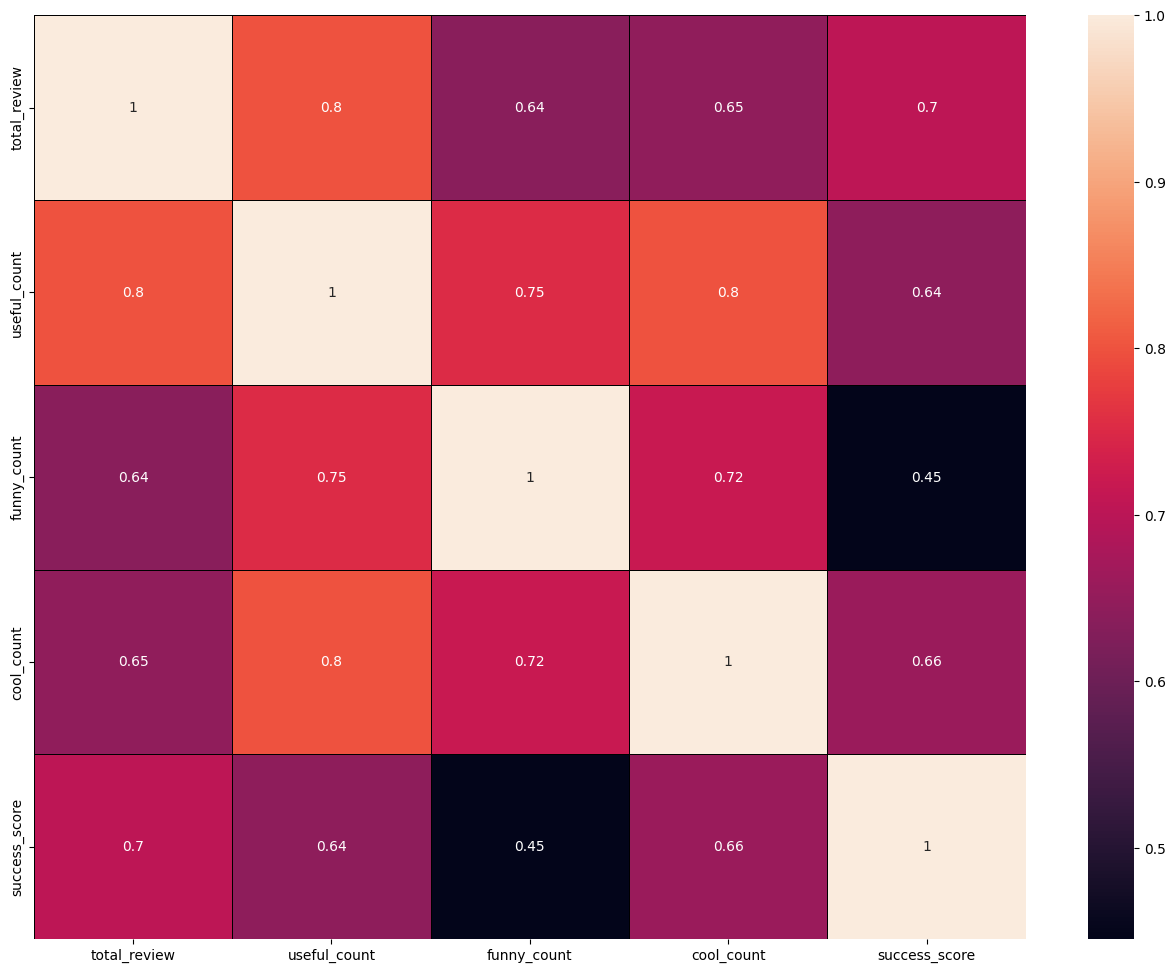

In [138]:
sns.heatmap(sentiment_df.iloc[:, 2:].corr(), annot=True, linewidths=0.5, linecolor='black')
plt.show()

In [140]:
# Is there any difference in engagement of elite users and non elite users?

elite_df = pd.read_sql_query("""SELECT
    elite,
    count(*) as num_users,
    SUM(review_count) as total_review_count
FROM
    (SELECT 
        CASE 
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END as elite,
        u.review_count
    FROM 
        user_df u) as user_elite
GROUP BY 
    elite;
""", conn)



In [141]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


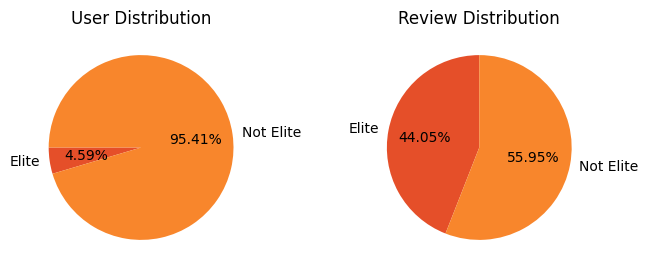

In [143]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct='%.2f%%', startangle = 180, colors = ['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f%%', startangle = 90, colors = ['#E54F29', '#F8862C'])
plt.show()


In [150]:
from datetime import datetime

In [151]:
#What are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""SELECT cast (strftime('%H', date) as integer)
as hour,
COUNT(*) AS review_count
FROM
review_df
GROUP BY
hour; """,conn)
tip_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H', date) as integer)
as hour,
COUNT(*) AS tip_count
FROM
tip_df
GROUP BY
hour;
""", conn)
checkin = pd.read_sql_query("SELECT date FROM checkin_df""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
    
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0) [[0]].count()

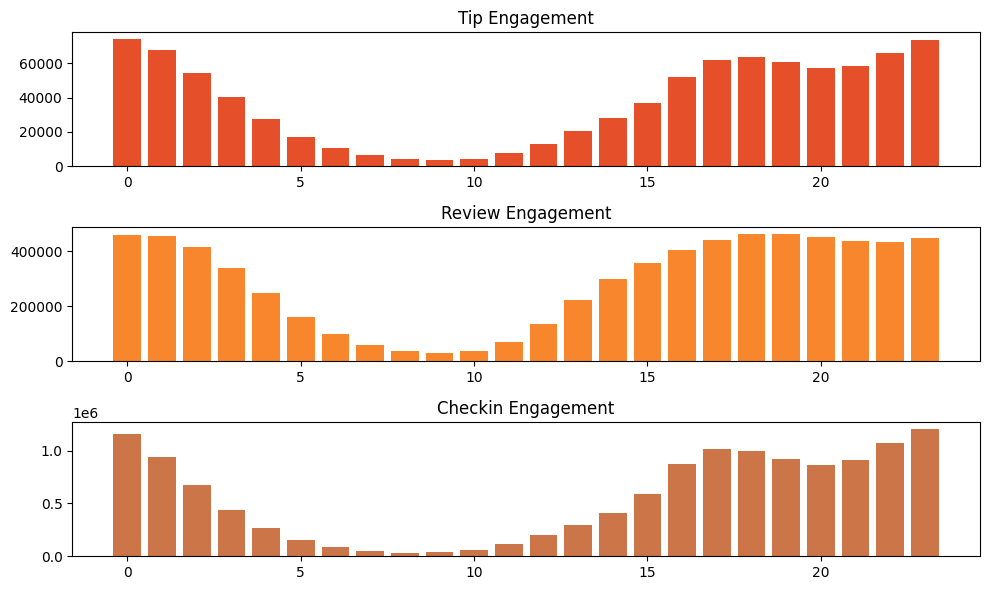

In [152]:
plt.figure(figsize = (10,6)) 
plt.subplot (3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement ['hour'], tip_engagement ['tip_count'], color = '#E54F29') 
plt.subplot (3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement ['hour'], review_engagement ['review_count'], color = '#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement. index, checkin_engagement [0], color = '#CB7548')
plt.tight_layout()
plt.show()